# Introduction to Pandas

No, not the animal! 

Pandas is a Python library for doing data analysis.  It allows you to easily read in large data sets and then explore them to discover interesting relationships or to make predictions based on the data.

The first step to using pandas is to import it.

NOTE: To execute a cell within a Notebook you must do **Shift-Enter**. 

In [1]:
import pandas as pd

## Data frames

Pandas creates data frames for storing large data sets.  A data frame is like a table with rows and columns. Each row represents all of the information about a particular entity, and each column represents a category of information about those entities. 

For example, in a data set about hospitals in the United States, each row would contain the data about a paricular hospital. Each column would represent particular categories of information about hospitals such as the name, city, state, rating, etc. 

Typically, we will call our data frames **df** for short, but you can use any valid python variable name you'd like. 

The line below reads in a CSV file named **"fitbit.csv"** and stores it in the variable **df**.

This file contains a month's worth of data collected from a person's fitbit device about their amount of activty each day. 

Note: You should have already downloaded this file to your laptop. If not, then go back to the lab write up to see how to download it now.

In [2]:
df = pd.read_csv("fitbit.csv")

## Observing the data

Let's try to gain an understanding of what exactly this data set contains.

We can use the **info()** command to get an overview of the data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Calories          30 non-null     int64  
 1   Steps             30 non-null     int64  
 2   Distance          30 non-null     float64
 3   Floors            30 non-null     int64  
 4   MinSedentary      30 non-null     int64  
 5   MinLightlyActive  30 non-null     int64  
 6   MinFairlyActive   30 non-null     int64  
 7   MinVeryActive     30 non-null     int64  
 8   ActivityCalories  30 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 2.2 KB


Notice that there are 9 columns and 30 rows in our data frame.  The columns have informative names to help you understand what they represesent. And the *Dtype* tells what *type* of information each column contains. Most of these columns contain integers, and one contains floating point numbers.

The *Min* in some column names is a shorthand for the number of minutes.

## Renaming columns

Some of these column names are long.  Let's see how we can change them to something shorter by using the **rename** command:

**df.rename(columns = {'OldName1':'NewName1', 'OldName2':'NewName2', ...}, inplace = True)**

Let's rename all of the columns that use *Min* in their name. These represent time spent at particular levels of activity from none, to low, to medium, to high.  

In [4]:
df.rename(columns={'MinSedentary':'TimeNone', 
                   'MinLightlyActive':'TimeLow', 
                   'MinFairlyActive':'TimeMed',
                   'MinVeryActive':'TimeHigh'}, 
          inplace=True)

Let's redo the **info()** command to see what we have now.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Calories          30 non-null     int64  
 1   Steps             30 non-null     int64  
 2   Distance          30 non-null     float64
 3   Floors            30 non-null     int64  
 4   TimeNone          30 non-null     int64  
 5   TimeLow           30 non-null     int64  
 6   TimeMed           30 non-null     int64  
 7   TimeHigh          30 non-null     int64  
 8   ActivityCalories  30 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 2.2 KB


Let's look at the first 5 entries in the data frame.

In [6]:
df.head()

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
0      2398  14371      6.16      41      1112      262       13        53   
1      1966  10005      4.33      30      1123      173       35        18   
2      2432  14150      6.41      49      1129      250        4        57   
3      2160  12234      5.33      22      1081      255       19        14   
4      2383  12896      5.40      29      1028      270       16        44   

   ActivityCalories  
0              1316  
1               806  
2              1295  
3              1034  
4              1280

Let's look at the last 5 entries using the **tail()** command.

In [7]:
df.tail()

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
25      3137  24513     10.70     173      1047      182       53       158   
26      2358  17479      7.59      77      1167      147       38        88   
27      2859  25512     11.13      81      1077      130      110       123   
28      2059  11161      4.87      24      1179      242       17         2   
29      3270  27875     12.13     112      1031      153       89       167   

    ActivityCalories  
25              2122  
26              1242  
27              1826  
28               929  
29              2271

For smaller data sets, you can display the entire data frame by just using the variable name (as shown below). 

For larger data sets, with hundreds or thousands of rows, this will only show you a few of the rows at the beginning of the data set and a few at the end of the data set.

In [8]:
df

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
0       2398  14371      6.16      41      1112      262       13        53   
1       1966  10005      4.33      30      1123      173       35        18   
2       2432  14150      6.41      49      1129      250        4        57   
3       2160  12234      5.33      22      1081      255       19        14   
4       2383  12896      5.40      29      1028      270       16        44   
5       2103  10847      4.73      18      1158      235       16        31   
6       2005   9499      4.09      21      1060      206       16        25   
7       2097  10973      4.60      25       914      155       41        45   
8       1905   6936      2.88      20      1279       85       14        47   
9       2218  14904      6.50      28      1161      191       33        55   
10      2641  17717      8.02      58      1069      265       37        69   
11      1864   7182      3.07      16      1228      193        9        10   
12      2129  12875      5.51      39      1161      127       27        63   
13      2131  11494      5.01      24      1003      236       14        30   
14      2266  13394      5.84      29      1117      273       43         7   
15      2369  13083      5.41      33      1052      220       15        69   
16      2417  14675      6.40      41      1009      238       32        64   
17      2851  21991      9.87      58      1015      335       18        72   
18      2033  10173      4.44      22      1127      207       15        28   
19      2167  12721      5.60      23      1230      125       20        65   
20      2313  14678      6.40      29      1104      277       20        39   
21      3170  22305      9.73      38       952      305       59       124   
22      2145  11488      5.01      23      1123      297        6        14   
23      2547  17497      7.63      41       987      404       20        29   
24      2447  15500      6.68      14      1089      328       14         9   
25      3137  24513     10.70     173      1047      182       53       158   
26      2358  17479      7.59      77      1167      147       38        88   
27      2859  25512     11.13      81      1077      130      110       123   
28      2059  11161      4.87      24      1179      242       17         2   
29      3270  27875     12.13     112      1031      153       89       167   

    ActivityCalories  
0               1316  
1                806  
2               1295  
3               1034  
4               1280  
5                976  
6                845  
7                943  
8                677  
9               1099  
10              1596  
11               682  
12               963  
13              1002  
14              1189  
15              1273  
16              1334  
17              1852  
18               872  
19               982  
20              1232  
21              2228  
22              1061  
23              1586  
24              1261  
25              2122  
26              1242  
27              1826  
28               929  
29              2271

You can look at individual columns by doing **df["ColName"]**, as shown below.

In [9]:
df["Floors"]

0      41
1      30
2      49
3      22
4      29
5      18
6      21
7      25
8      20
9      28
10     58
11     16
12     39
13     24
14     29
15     33
16     41
17     58
18     22
19     23
20     29
21     38
22     23
23     41
24     14
25    173
26     77
27     81
28     24
29    112
Name: Floors, dtype: int64

You can also do **df.ColName** as shown below. 

Note: you must follow the exact spelling and capitalization used for each column name. If you get an error, it's likely that you did not use the correct column name.

In [10]:
df.Floors

0      41
1      30
2      49
3      22
4      29
5      18
6      21
7      25
8      20
9      28
10     58
11     16
12     39
13     24
14     29
15     33
16     41
17     58
18     22
19     23
20     29
21     38
22     23
23     41
24     14
25    173
26     77
27     81
28     24
29    112
Name: Floors, dtype: int64

**Exercise:** Go back up to the top and pick a different column name to explore.

In [11]:
# use df["ColName"] or df.ColName on a different column from this data set



For large data sets it can be helpful to look at a smaller sample from the data.  The **sample** command will randomly pick **n** rows to display.  Try re-executing the next cell several times and notice that you do get different outputs each time.

In [12]:
df.sample(n=5)

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
7       2097  10973      4.60      25       914      155       41        45   
28      2059  11161      4.87      24      1179      242       17         2   
12      2129  12875      5.51      39      1161      127       27        63   
26      2358  17479      7.59      77      1167      147       38        88   
19      2167  12721      5.60      23      1230      125       20        65   

    ActivityCalories  
7                943  
28               929  
12               963  
26              1242  
19               982

You can use **nsmallest** to find the rows with the smallest values in a particular column. Here we are finding the 5 smallest Floors:

In [13]:
df.nsmallest(5, "Floors")

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
24      2447  15500      6.68      14      1089      328       14         9   
11      1864   7182      3.07      16      1228      193        9        10   
5       2103  10847      4.73      18      1158      235       16        31   
8       1905   6936      2.88      20      1279       85       14        47   
6       2005   9499      4.09      21      1060      206       16        25   

    ActivityCalories  
24              1261  
11               682  
5                976  
8                677  
6                845

Similaryly, you can use **nlargest** to find the rows with the 5 largest values:

In [14]:
df.nlargest(5,"Floors")

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
25      3137  24513     10.70     173      1047      182       53       158   
29      3270  27875     12.13     112      1031      153       89       167   
27      2859  25512     11.13      81      1077      130      110       123   
26      2358  17479      7.59      77      1167      147       38        88   
10      2641  17717      8.02      58      1069      265       37        69   

    ActivityCalories  
25              2122  
29              2271  
27              1826  
26              1242  
10              1596

**Exercise:** Find the 3 days where the most calories were expended.

In [15]:
# Days with most calories


**Exercise:** Find the 3 days when the least calories were expended.

In [16]:
# Days with least calories


## Summarizing the data

Pandas provides lots of ways of summarizing the data. 

For example, you can use **describe()** to calculate a lot of information about all of the numeric columns.  This includes the average, standard deviation, minimum, and maximum.

In [17]:
df.describe()

Calories         Steps   Distance      Floors     TimeNone  \
count    30.000000     30.000000  30.000000   30.000000    30.000000   
mean   2361.333333  14670.933333   6.382333   41.266667  1093.733333   
std     373.126708   5228.015645   2.323511   33.076644    83.371596   
min    1864.000000   6936.000000   2.880000   14.000000   914.000000   
25%    2109.500000  11242.750000   4.905000   23.000000  1035.000000   
50%    2289.500000  13238.500000   5.720000   29.000000  1096.500000   
75%    2443.250000  16984.250000   7.362500   41.000000  1150.750000   
max    3270.000000  27875.000000  12.130000  173.000000  1279.000000   

          TimeLow     TimeMed    TimeHigh  ActivityCalories  
count   30.000000   30.000000   30.000000         30.000000  
mean   225.533333   28.766667   53.966667       1259.133333  
std     72.008492   23.618642   42.572845        433.547256  
min     85.000000    4.000000    2.000000        677.000000  
25%    175.250000   15.000000   25.750000        966.250000  
50%    235.500000   19.500000   46.000000       1210.500000  
75%    268.750000   36.500000   68.000000       1329.500000  
max    404.000000  110.000000  167.000000       2271.000000

You can also compute these individually, if you prefer, by doing:
- **df.ColName.mean()**
- **df.ColName.median()**
- **df.ColName.min()**
- **df.ColName.max()**

**Exercise:** Find the median of the Floors column. How is the median different from the mean?


In [18]:
# Median of Floors


You can find the sum of all of the Floors climbed in the entire data set.

In [19]:
df.Floors.sum()

1238

**Exercise:** The Empire State Building has 102 floors. Using the sum of the floors climbed in the fitbit data, how many Empire State Buildings is this equivalent to?

In [20]:
# Number of times the Empire State Building would have been climbed


## Sorting the data

It is often useful to see the data sorted by particular columns. By default, pandas will sort in ascending order. 

To sort, do **df.sort_values("ColName")**. 

For example, we can sort by the number of calories expended.

In [21]:
df.sort_values("Calories")

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
11      1864   7182      3.07      16      1228      193        9        10   
8       1905   6936      2.88      20      1279       85       14        47   
1       1966  10005      4.33      30      1123      173       35        18   
6       2005   9499      4.09      21      1060      206       16        25   
18      2033  10173      4.44      22      1127      207       15        28   
28      2059  11161      4.87      24      1179      242       17         2   
7       2097  10973      4.60      25       914      155       41        45   
5       2103  10847      4.73      18      1158      235       16        31   
12      2129  12875      5.51      39      1161      127       27        63   
13      2131  11494      5.01      24      1003      236       14        30   
22      2145  11488      5.01      23      1123      297        6        14   
3       2160  12234      5.33      22      1081      255       19        14   
19      2167  12721      5.60      23      1230      125       20        65   
9       2218  14904      6.50      28      1161      191       33        55   
14      2266  13394      5.84      29      1117      273       43         7   
20      2313  14678      6.40      29      1104      277       20        39   
26      2358  17479      7.59      77      1167      147       38        88   
15      2369  13083      5.41      33      1052      220       15        69   
4       2383  12896      5.40      29      1028      270       16        44   
0       2398  14371      6.16      41      1112      262       13        53   
16      2417  14675      6.40      41      1009      238       32        64   
2       2432  14150      6.41      49      1129      250        4        57   
24      2447  15500      6.68      14      1089      328       14         9   
23      2547  17497      7.63      41       987      404       20        29   
10      2641  17717      8.02      58      1069      265       37        69   
17      2851  21991      9.87      58      1015      335       18        72   
27      2859  25512     11.13      81      1077      130      110       123   
25      3137  24513     10.70     173      1047      182       53       158   
21      3170  22305      9.73      38       952      305       59       124   
29      3270  27875     12.13     112      1031      153       89       167   

    ActivityCalories  
11               682  
8                677  
1                806  
6                845  
18               872  
28               929  
7                943  
5                976  
12               963  
13              1002  
22              1061  
3               1034  
19               982  
9               1099  
14              1189  
20              1232  
26              1242  
15              1273  
4               1280  
0               1316  
16              1334  
2               1295  
24              1261  
23              1586  
10              1596  
17              1852  
27              1826  
25              2122  
21              2228  
29              2271

If you'd rather sort in descending order then do: **df.sort_values("ColName", ascending=False)**.

In [22]:
df.sort_values("Calories", ascending=False)

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
29      3270  27875     12.13     112      1031      153       89       167   
21      3170  22305      9.73      38       952      305       59       124   
25      3137  24513     10.70     173      1047      182       53       158   
27      2859  25512     11.13      81      1077      130      110       123   
17      2851  21991      9.87      58      1015      335       18        72   
10      2641  17717      8.02      58      1069      265       37        69   
23      2547  17497      7.63      41       987      404       20        29   
24      2447  15500      6.68      14      1089      328       14         9   
2       2432  14150      6.41      49      1129      250        4        57   
16      2417  14675      6.40      41      1009      238       32        64   
0       2398  14371      6.16      41      1112      262       13        53   
4       2383  12896      5.40      29      1028      270       16        44   
15      2369  13083      5.41      33      1052      220       15        69   
26      2358  17479      7.59      77      1167      147       38        88   
20      2313  14678      6.40      29      1104      277       20        39   
14      2266  13394      5.84      29      1117      273       43         7   
9       2218  14904      6.50      28      1161      191       33        55   
19      2167  12721      5.60      23      1230      125       20        65   
3       2160  12234      5.33      22      1081      255       19        14   
22      2145  11488      5.01      23      1123      297        6        14   
13      2131  11494      5.01      24      1003      236       14        30   
12      2129  12875      5.51      39      1161      127       27        63   
5       2103  10847      4.73      18      1158      235       16        31   
7       2097  10973      4.60      25       914      155       41        45   
28      2059  11161      4.87      24      1179      242       17         2   
18      2033  10173      4.44      22      1127      207       15        28   
6       2005   9499      4.09      21      1060      206       16        25   
1       1966  10005      4.33      30      1123      173       35        18   
8       1905   6936      2.88      20      1279       85       14        47   
11      1864   7182      3.07      16      1228      193        9        10   

    ActivityCalories  
29              2271  
21              2228  
25              2122  
27              1826  
17              1852  
10              1596  
23              1586  
24              1261  
2               1295  
16              1334  
0               1316  
4               1280  
15              1273  
26              1242  
20              1232  
14              1189  
9               1099  
19               982  
3               1034  
22              1061  
13              1002  
12               963  
5                976  
7                943  
28               929  
18               872  
6                845  
1                806  
8                677  
11               682

**Exercise:** Sort the data by Distance.

In [23]:
# Data sorted by Distance


## Querying the data

We may want to ask questions about the data. Querys allow us to do this by using Python conditionals. Remember that conditionals return a boolean value (either **True** or **False**).

For example, in this Fitbit data, how many times did they climb more than 50 floors? 

We will use **df.query('Floors > 50')**.  

Notice that the conditional is in single quotes. 

This will return a new data frame containing only the rows where the conditional was True.

In [24]:
df.query('Floors > 50')

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
10      2641  17717      8.02      58      1069      265       37        69   
17      2851  21991      9.87      58      1015      335       18        72   
25      3137  24513     10.70     173      1047      182       53       158   
26      2358  17479      7.59      77      1167      147       38        88   
27      2859  25512     11.13      81      1077      130      110       123   
29      3270  27875     12.13     112      1031      153       89       167   

    ActivityCalories  
10              1596  
17              1852  
25              2122  
26              1242  
27              1826  
29              2271

**Exercise:** Write a query to find out how many times they had fewer than 10000 steps.

In [25]:
# Query to find when they had fewer than 10000 steps


We can ask more complicated questions by combining conditionals with python's logical operators **and**, **or**.

For example, if we want to know when they climbed more than 50 floors *and* walked more than 20000 steps we could do:

In [26]:
df.query('Floors > 50 and Steps > 20000')

Calories  Steps  Distance  Floors  TimeNone  TimeLow  TimeMed  TimeHigh  \
17      2851  21991      9.87      58      1015      335       18        72   
25      3137  24513     10.70     173      1047      182       53       158   
27      2859  25512     11.13      81      1077      130      110       123   
29      3270  27875     12.13     112      1031      153       89       167   

    ActivityCalories  
17              1852  
25              2122  
27              1826  
29              2271

**Exercise:** Write a query to find out when the sum of the TimeMed and TimeHigh  is higher than the TimeLow.

In [27]:
# Query about minutes active


## Finding correlations in the data

A correlation is a statistical measure that represents the extent to which two variables are linearly related.  

When two variables are positively correlated that means we would expect that when one variable increases the other does too.

When two variables are negatively correlated that means we would expect that when one variable increases the other decreases (and vice versa). 

A correlation measure ranges between -1 and +1, with values close to 0 indicating that there is no correlation. 

Data scientists are often interested in correlations, because they may help to make predictions. However, it is essential to remember that correlations do not necessarily imply causation.  

Pandas provides an easy way to examine correlations within a data frame that is made up entirely of numeric data.

In [28]:
df.corr()

Calories     Steps  Distance    Floors  TimeNone   TimeLow  \
Calories          1.000000  0.961020  0.958831  0.752977 -0.531436  0.218749   
Steps             0.961020  1.000000  0.998720  0.785134 -0.454855  0.117287   
Distance          0.958831  0.998720  1.000000  0.781945 -0.445857  0.130421   
Floors            0.752977  0.785134  0.781945  1.000000 -0.233093 -0.193294   
TimeNone         -0.531436 -0.454855 -0.445857 -0.233093  1.000000 -0.445959   
TimeLow           0.218749  0.117287  0.130421 -0.193294 -0.445959  1.000000   
TimeMed           0.655963  0.752559  0.740554  0.610220 -0.306418 -0.330247   
TimeHigh          0.834906  0.836866  0.827084  0.832637 -0.293090 -0.311605   
ActivityCalories  0.996136  0.956880  0.955280  0.735992 -0.557864  0.268267   

                   TimeMed  TimeHigh  ActivityCalories  
Calories          0.655963  0.834906          0.996136  
Steps             0.752559  0.836866          0.956880  
Distance          0.740554  0.827084          0.955280  
Floors            0.610220  0.832637          0.735992  
TimeNone         -0.306418 -0.293090         -0.557864  
TimeLow          -0.330247 -0.311605          0.268267  
TimeMed           1.000000  0.732265          0.646521  
TimeHigh          0.732265  1.000000          0.810837  
ActivityCalories  0.646521  0.810837          1.000000

This is a little overwhelming!  Let's focus on just a few columns instead of the entire data frame.

You can select a subset of columns like this: **df[["ColName1", "ColName2", ...]]**

In [29]:
df[["Distance", "Calories", "TimeNone"]].corr()

Distance  Calories  TimeNone
Distance  1.000000  0.958831 -0.445857
Calories  0.958831  1.000000 -0.531436
TimeNone -0.445857 -0.531436  1.000000

Notice that a column is always perfectly correlated with itself (having a value of exactly 1). 

Here we see that Distance and Calories have positive correlations with one another.  This makes sense because the more distance you cover then the more calories you burn.

We also see that the number of minutes sedentary, TimeNone, is most negatively correlated with calories.  This too makes sense because the amount of time you spend sedentary (not moving) then the less calories you will burn that day.

**Exercise:** Take a look back at the large table of correlations above. 

What is the correlation between Floors and Calories? 

Explain why this makes sense.

## Plotting relationships within the data

Pandas also provides an easy interface for making a scatter plot of the interesting relationships that you find within the data.

The plotting command is: **df.plot.scatter(x="ColName1", y="ColName2")**.


### Positive correlations

Let's start by plotting one of the positive correlations we discovered between Distance and Calories.

Notice that with a positive correlation, we can see the linear relationship growing from left to right. As the Distance increases so does the Calories.

<Axes: xlabel='Distance', ylabel='Calories'>

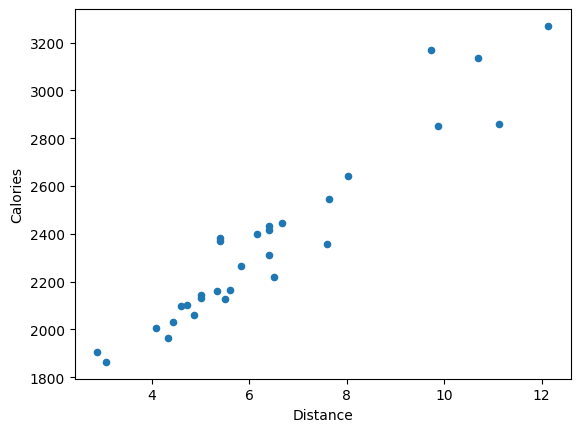

In [30]:
df.plot.scatter(x="Distance", y="Calories")

### Negative correlations

Next let's look at the negative correlation we found between MinSedentary and Calories.

This one is not as strong of a correlation as the one above so the linear aspect is not as obvious, however you can see that as the MinSedentary increases the Calories decreases. 

<Axes: xlabel='TimeNone', ylabel='Calories'>

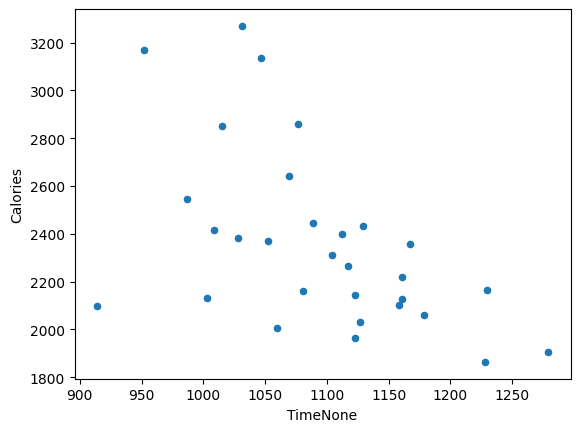

In [31]:
df.plot.scatter(x="TimeNone", y="Calories")

**Exercise:** Go back to the large table of correlations we made above.  Find a combination that results in a correlation value very close to 0. Make a plot of these two columns. 

Typically when you plot two columns that do not have a strong correlation the data will simply look more like a blob than a line.

In [32]:
# plot two columns that have a correlation value close to 0


## Using Histograms 

A histogram is another type of plot that helps you to understand the frequency with which something occurs within your data. 

Typically you would create a histogram focused on a particular column: **df["ColName"].plot.hist()**

For example, let's make a histogram of Steps. 

<Axes: ylabel='Frequency'>

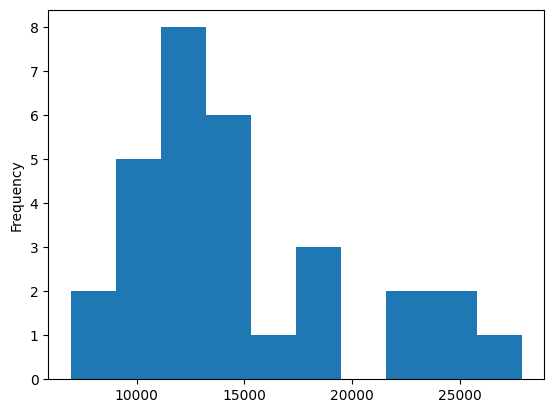

In [33]:
df["Steps"].plot.hist()

This shows us that there was only 1 day where they walked more than 25000 steps, and there were 2 days were they walked under 10000 steps.

**Exercise:** Make a histogram of Floors, and answer the following questions:

How many days did they walk just 20 floors?

How many days did they walk over 140 floors?



In [34]:
# Plot a histogram of Floors
